### Ideias
- Adicionar probabilidade de alta variação, além dos limites tradicionais
- Integração entre variáveis claramente correlacionadas
- H2 e Metano inversamente proporcionais de modo que a soma de seus valores apresente uma variação de 75-105% (tipicamente 93-98%) do total

- ✅ H2
- ✅ Metano
- ⚠️ Etileno
- ✅ Etano
- Propileno
- ✅ Propano
- ⚠️ N-Butano
- ✅ C5+
- CO
- ✅ CO2
- ⚠️ Enxofre

Node H2: Metano, Enxofre, Etileno, N-Butano, 
Node Metano: Etano, Propano, C5+, CO2, 
Node Enxofre: 
Node Etileno: 
Node N-Butano: 
Node Etano: 
Node Propano: 
Node C5+: 
Node CO2: 


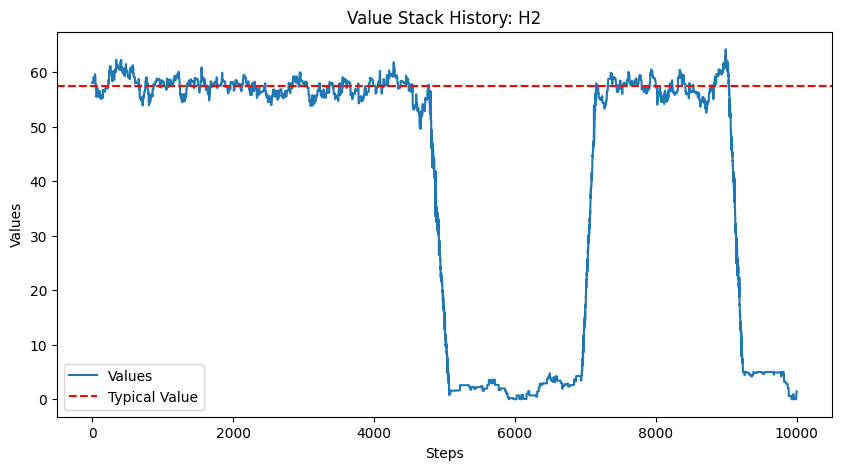

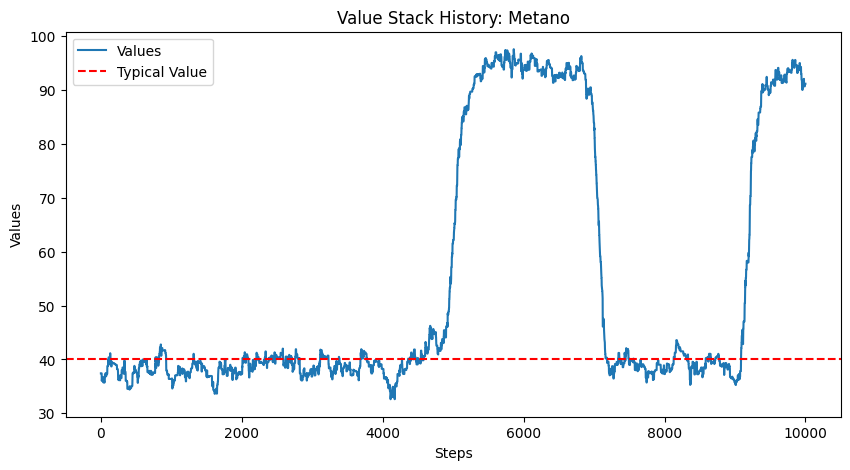

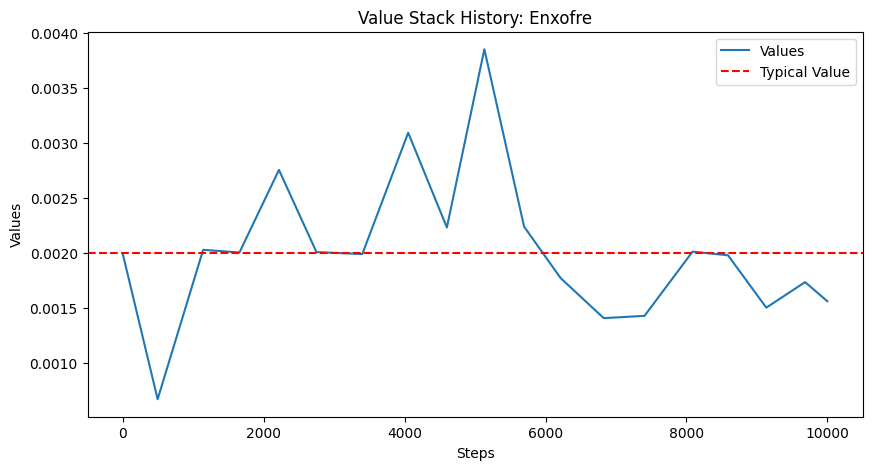

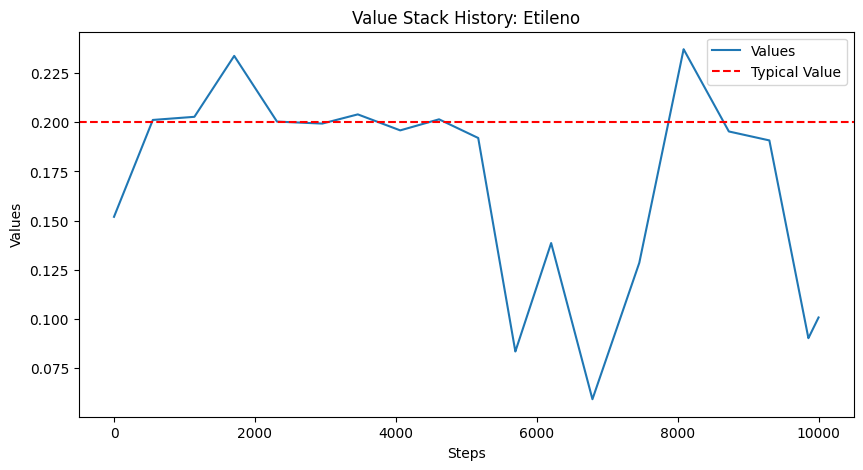

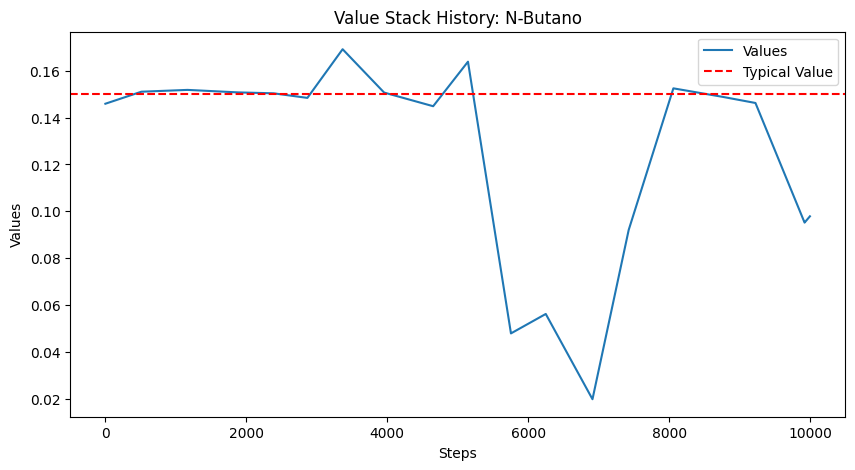

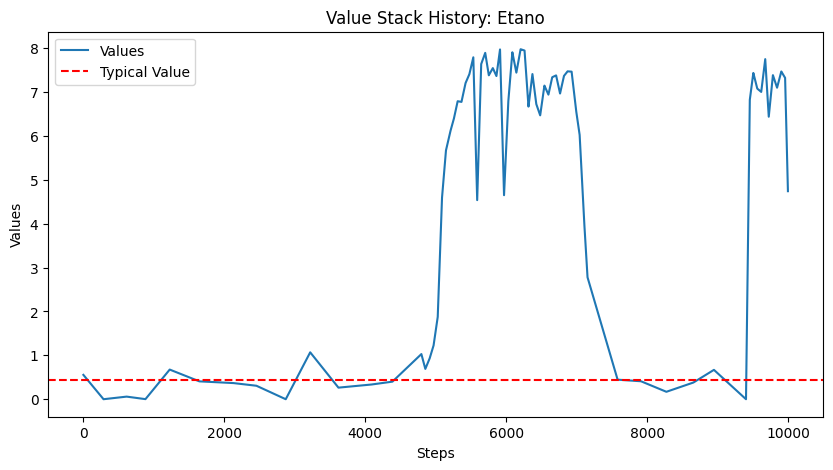

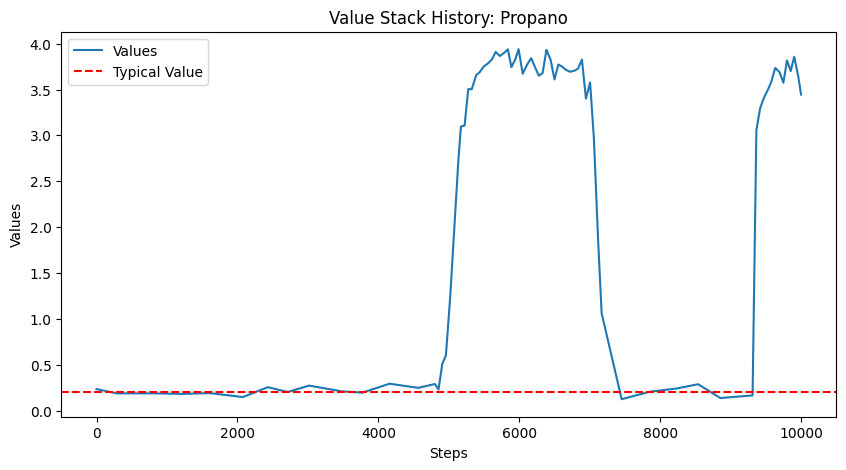

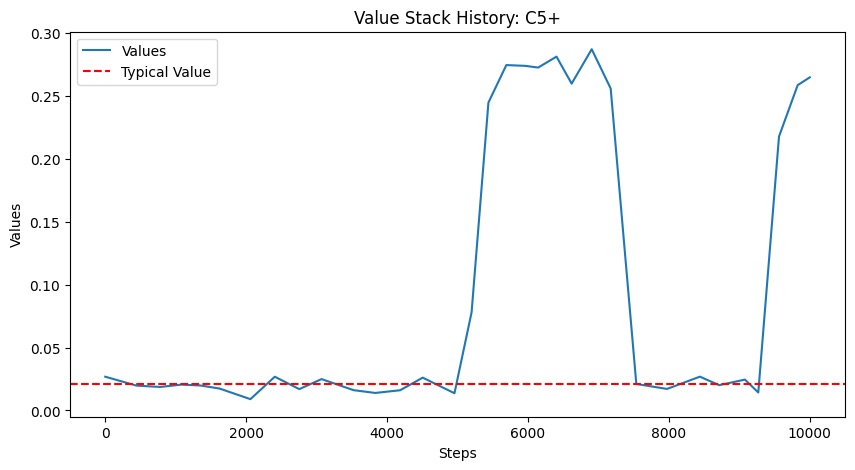

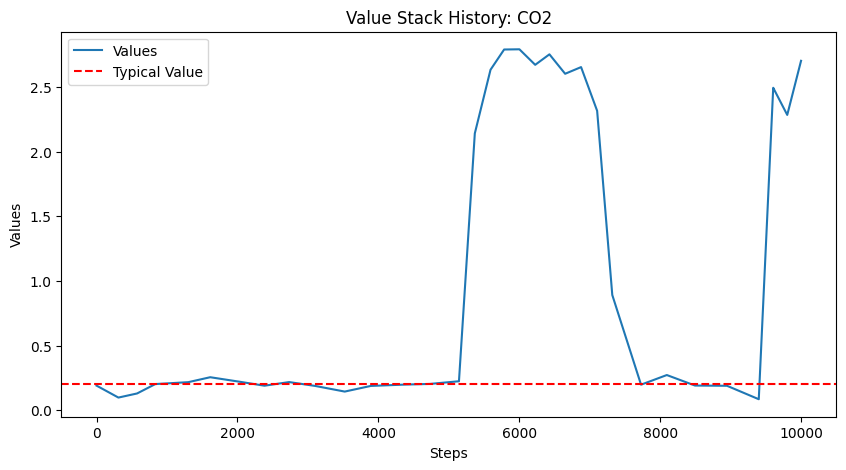

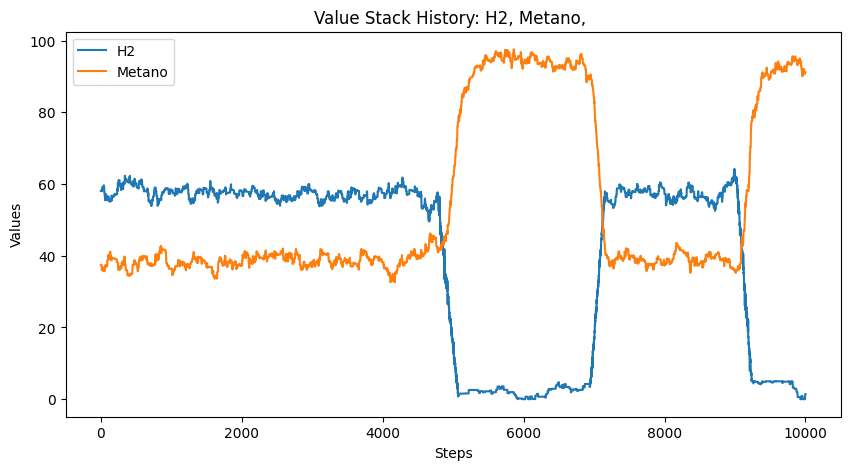

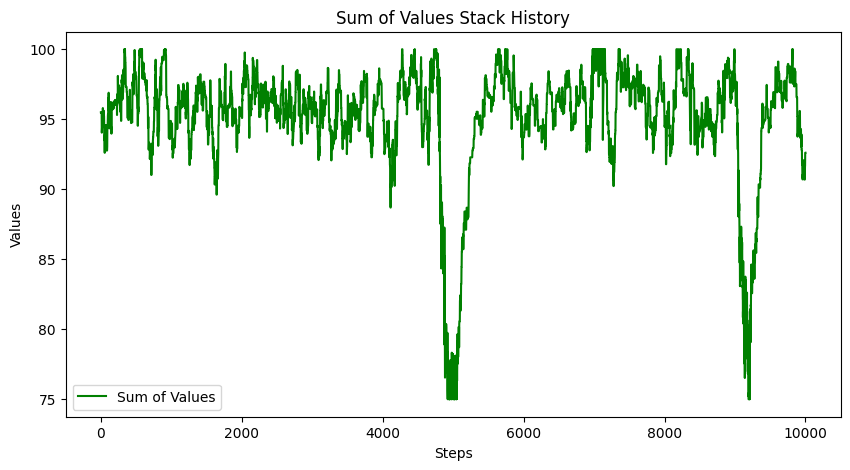

In [1]:
from Operators import GreatVariation, LittleVariation
from Relations import CorrelacaoH2Metano, CorrelacaoGreatLittle, CorrelacaoGreatLittle2
from TurbineSimulator import Graph, show_history, show_sum_history

H2      = GreatVariation(lower_bound=30, 
                   upper_bound=70, 
                   typical_value=57.5, 
                   name="H2", 
                   typical_bias=0.1,
                   typical_bias_prob=0.1,
                   theta=1.5, 
                   theta_prob=0.1,
                   exceed_prob=0.0001, 
                   exceed_duration_range=(180,300),
                   return_duration_range=(180,300), 
                   exceed_bias_range=(-5,5),
                   exceed_bias_prob=0.05,
                   exceed_peak_value_range=(0,5),
                   hold_duration_range=(1500,2000),
                   hold_prob_vary=0.05,
                   hold_variation=1)
Metano  = GreatVariation(lower_bound=30, 
                   upper_bound=70, 
                   typical_value=40, 
                   name="Metano", 
                   typical_bias=0.1,
                   typical_bias_prob=0.1,
                   theta=1.5, 
                   theta_prob=0.1)
relation1 = CorrelacaoH2Metano(limit_lower_bound=75, 
                               limit_upper_bound=100,
                               typical_lower_bound=93,
                               typical_upper_bound=98)

Enxofre = LittleVariation(lower_bound=0, 
                         upper_bound=8, 
                         typical_value=0.002,
                         name="Enxofre", 
                         theta=0.002, 
                         steps_range=(480,700))
relation2 = CorrelacaoGreatLittle(correlation=0.3,
                                  typical_bias_prob=0.1,
                                  typical_bias=0.6,
                                  theta_prob=0.5)

Etileno = LittleVariation(lower_bound=0.05,
                          upper_bound=0.55,
                          typical_value=0.2,
                          name="Etileno",
                          theta=0.05,
                          steps_range=(480,700))
relation3 = CorrelacaoGreatLittle(correlation=0.6,
                                  typical_bias_prob=0.1,
                                  typical_bias=0.01,
                                  theta_prob=0.5)

NButano = LittleVariation(lower_bound=0.01,
                          upper_bound=0.45,
                          typical_value=0.15,
                          name="N-Butano",
                          theta=0.03,
                          steps_range=(480,700))
relation4 = CorrelacaoGreatLittle(correlation=0.7,
                                  typical_bias_prob=0.4,
                                  typical_bias=0.4,
                                  theta_prob=0.5)

Etano = LittleVariation(lower_bound=0.06,
                        upper_bound=1.8,
                        typical_value=0.43,
                        name="Etano",
                        theta=0.7,
                        steps_range=(240,480))
relation5 = CorrelacaoGreatLittle2(correlation=0.85,
                                   typical_bias_prob=0.1,
                                   typical_bias=0.4,
                                   theta_prob=0.7,
                                   amplifier=14,
                                   holding_range=(50,60))

Propano = LittleVariation(lower_bound=0,
                          upper_bound=0.69,
                          typical_value=0.2,
                          name="Propano",
                          theta=0.1,
                          steps_range=(240,480))
relation6 = CorrelacaoGreatLittle2(correlation=0.94,
                                   typical_bias_prob=0.01,
                                   typical_bias=0.8,
                                   theta_prob=0.7,
                                   amplifier=14,
                                   holding_range=(50,60))

C5 = LittleVariation(lower_bound=0,
                     upper_bound=0.3,
                     typical_value=0.021,
                     name="C5+",
                     theta=0.01,
                     steps_range=(240,480))
relation7 = CorrelacaoGreatLittle2(correlation=0.89,
                                   typical_bias=0.01,
                                   typical_bias_prob=0.1,
                                   theta_prob=0.7,
                                   amplifier=10,
                                   holding_range=(180,300))

CO2 = LittleVariation(lower_bound=0,
                      upper_bound=0.3,
                      typical_value=0.2,
                      name="CO2",
                      theta=0.1,
                      steps_range=(240,480))
relation8 = CorrelacaoGreatLittle2(correlation=0.92,
                                   typical_bias=0.1,
                                   typical_bias_prob=0.1,
                                   theta_prob=0.7,
                                   amplifier=10,
                                   holding_range=(180,230))

# graph = Graph(random_seed=None)
graph = Graph(random_seed=43)
node1 = graph.add_node(H2)
node2 = graph.add_node(Metano)
graph.add_edge(root=node1, child=node2, strategy=relation1)
node3 = graph.add_node(Enxofre)
graph.add_edge(root=node1, child=node3, strategy=relation2)
node4 = graph.add_node(Etileno)
graph.add_edge(root=node1, child=node4, strategy=relation3)
node5 = graph.add_node(NButano)
graph.add_edge(root=node1, child=node5, strategy=relation4)
node6 = graph.add_node(Etano)
graph.add_edge(root=node2, child=node6, strategy=relation5)
node7 = graph.add_node(Propano)
graph.add_edge(root=node2, child=node7, strategy=relation6)
node8 = graph.add_node(C5)
graph.add_edge(root=node2, child=node8, strategy=relation7)
node9 = graph.add_node(CO2)
graph.add_edge(root=node2, child=node9, strategy=relation8)

graph.display()
graph.simulate(10000)
# graph.simulate(6000)
node1.op.show_history()
node2.op.show_history()
node3.op.show_history()
node4.op.show_history()
node5.op.show_history()
node6.op.show_history()
node7.op.show_history()
node8.op.show_history()
node9.op.show_history()

show_history(nodes=[node1, node2])
show_sum_history(node1, node2)